In [1]:
import pandas as pd
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# %matplotlib inline

plt.style.use('ggplot')


In [2]:
train = pd.read_csv('./data/train.csv', parse_dates = ['datetime'])
train.shape

(10886, 12)

In [6]:
test = pd.read_csv('./data/test.csv', parse_dates = ['datetime'])
test.shape

(6493, 9)

In [7]:
train['year'] = train['datetime'].dt.year
train['month'] = train['datetime'].dt.month
train['day'] = train['datetime'].dt.day
train['hour'] = train['datetime'].dt.hour
train['minute'] = train['datetime'].dt.minute
train['second'] = train['datetime'].dt.second
train['dayofweek'] = train['datetime'].dt.dayofweek

train.shape

(10886, 19)

In [9]:
test['year'] = test['datetime'].dt.year
test['month'] = test['datetime'].dt.month
test['day'] = test['datetime'].dt.day
test['hour'] = test['datetime'].dt.hour
test['minute'] = test['datetime'].dt.minute
test['second'] = test['datetime'].dt.second
test['dayofweek'] = test['datetime'].dt.dayofweek

test.shape

(6493, 16)

<AxesSubplot:title={'center':'test windspeed'}, xlabel='windspeed', ylabel='count'>

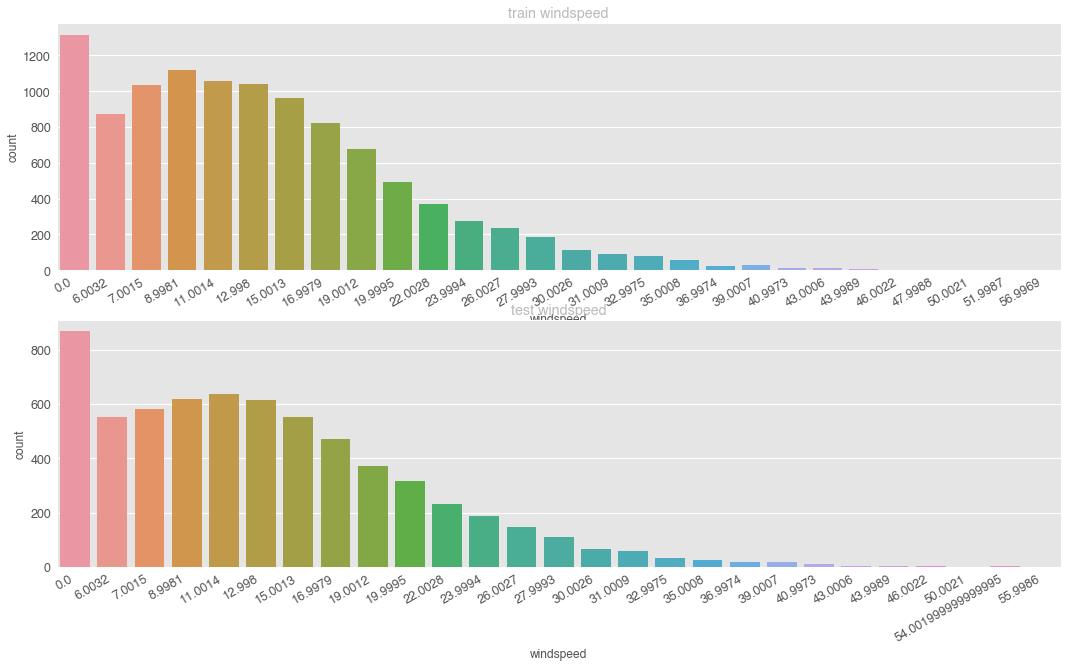

In [12]:
fig, axes = plt.subplots(nrows = 2)
fig.set_size_inches(18, 10)

plt.sca(axes[0])
plt.xticks(rotation = 30, ha = 'right')
axes[0].set(ylabel = 'count', title = 'train windspeed')
sns.countplot(data = train, x = 'windspeed', ax = axes[0])

plt.sca(axes[1])
plt.xticks(rotation = 30, ha = 'right')
axes[1].set(ylabel = 'count', title = 'test windspeed')
sns.countplot(data = test, x = 'windspeed', ax = axes[1])

In [14]:
trainWind0 = train.loc[train['windspeed'] == 0]
trainWindNot0 = train.loc[train['windspeed'] != 0]

In [15]:
from sklearn.ensemble import RandomForestClassifier

def predict_windspeed(data):
    # windspeed 0 and not 0
    dataWind0 = data.loc[data['windspeed'] == 0]
    dataWindNot0 = data.loc[data['windspeed'] != 0]
    
    # select features that could be used to predict windspeed ("wind features")
    wCol = ['season', 'weather', 'humidity', 'month', 'temp', 'year', 'atemp']
    
    # change data type to string
    dataWindNot0['windspeed'] = dataWindNot0['windspeed'].astype('str')
    
    # create Random Forest Classifier
    rfModel_wind = RandomForestClassifier()
    
    # Train the model with the "wind features" 
    rfModel_wind.fit(dataWindNot0[wCol], dataWindNot0['windspeed'])
    
    # predict the data's windspeed using the trained model
    wind0Values = rfModel_wind.predict(X = dataWind0[wCol])
    
    
    predictWind0 = dataWind0
    predictWindNot0 = dataWindNot0
    
    predictWind0['windspeed'] = wind0Values
    
    data = predictWindNot0.append(predictWind0)
    
    data['windspeed'] = data['windspeed'].astype('float')
    
    data.reset_index(inplace = True)
    data.drop('index', inplace = True, axis = 1)
    
    return data

/Users/siro/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if __name__ == '__main__':
/Users/siro/.pyenv/versions/3.7.0/lib/python3.7/site-packages/ipykernel_launcher.py:20: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


<AxesSubplot:title={'center':'train windspeed'}, xlabel='windspeed', ylabel='count'>

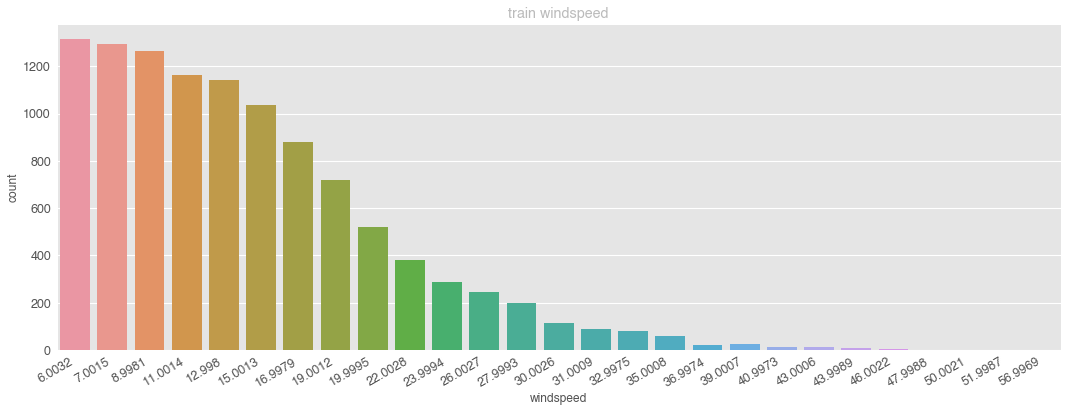

In [16]:
train = predict_windspeed(train)

fig, ax1 = plt.subplots()
fig.set_size_inches(18, 6)

plt.sca(ax1)
plt.xticks(rotation = 30, ha = 'right')
ax1.set(ylabel = 'count', title = 'train windspeed')
sns.countplot(data = train, x = 'windspeed', ax = ax1)

In [18]:
categorical_features = ['season', 'holiday', 'workingday', 'weather', 'dayofweek', 'month', 'year', 'hour']

for var in categorical_features:
    train[var] = train[var].astype('category')
    test[var] = test[var].astype('category')

In [20]:
feature_names = ['season', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'year', 'hour', 'dayofweek',
                 'holiday', 'workingday']

feature_names

['season',
 'weather',
 'temp',
 'atemp',
 'humidity',
 'windspeed',
 'year',
 'hour',
 'dayofweek',
 'holiday',
 'workingday']

In [22]:
X_train = train[feature_names]

print(X_train.shape)
X_train.head()

(10886, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,2,9.84,12.880,75,6.0032,2011,5,5,0,0
1,1,1,15.58,19.695,76,16.9979,2011,10,5,0,0
2,1,1,14.76,16.665,81,19.0012,2011,11,5,0,0
3,1,1,17.22,21.210,77,19.0012,2011,12,5,0,0
4,1,2,18.86,22.725,72,19.9995,2011,13,5,0,0


In [24]:
X_test = test[feature_names]

print(X_test.shape)
X_test.head()

(6493, 11)


,season,weather,temp,atemp,humidity,windspeed,year,hour,dayofweek,holiday,workingday
0,1,1,10.66,11.365,56,26.0027,2011,0,3,0,1
1,1,1,10.66,13.635,56,0.0000,2011,1,3,0,1
2,1,1,10.66,13.635,56,0.0000,2011,2,3,0,1
3,1,1,10.66,12.880,56,11.0014,2011,3,3,0,1
4,1,1,10.66,12.880,56,11.0014,2011,4,3,0,1


In [25]:
label_name = 'count'

y_train = train[label_name]

print(y_train.shape)
y_train.head()

(10886,)


0     1
1    36
2    56
3    84
4    94
Name: count, dtype: int64

# Sore
# RMSLE (Root Mean Squared Log Error)
\begin{equation*}
\sqrt{ \frac{1}{n} \sum_{i=1}^{n} (\log(p_i + 1) - \log(a_i + 1))^2}
\end{equation*}
* $n$ is the number of hours in the test set
* $p_i$ is your predicted count
* $a_i$ is the actual count
* $\log(x)$ is the natural logarithm

* <a href = 'https://medium.com/analytics-vidhya/root-mean-square-log-error-rmse-vs-rmlse-935c6cc1802a'> Detailed explaination</a>

In [27]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    difference = (log_predict - log_actual) ** 2
    
    mean_difference = difference.mean()
    
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [29]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits = 10, shuffle = True, random_state = 0)

In [31]:
from sklearn.ensemble import RandomForestRegressor

max_depth_list = []

model = RandomForestRegressor(n_estimators=100,
                              n_jobs = -1,
                              random_state = 0)
model

RandomForestRegressor(n_jobs=-1, random_state=0)

In [32]:
%time score = cross_val_score(model,X_train, y_train, cv=k_fold, scoring = rmsle_scorer)
score = score.mean()

print('Score = {0:.5f}'.format(score))

CPU times: user 3.48 s, sys: 1.83 s, total: 5.31 s
Wall time: 7.28 s
Score = 0.33072


# Train

In [33]:
model.fit(X_train, y_train)

RandomForestRegressor(n_jobs=-1, random_state=0)

In [34]:
predictions = model.predict(X_test)

print(predictions.shape)
predictions[:10]

(6493,)


array([ 12.72,   5.01,   3.92,   3.48,   3.16,   5.91,  38.15, 105.19,
       236.15, 136.46])

[Text(0.5, 1.0, 'test')]

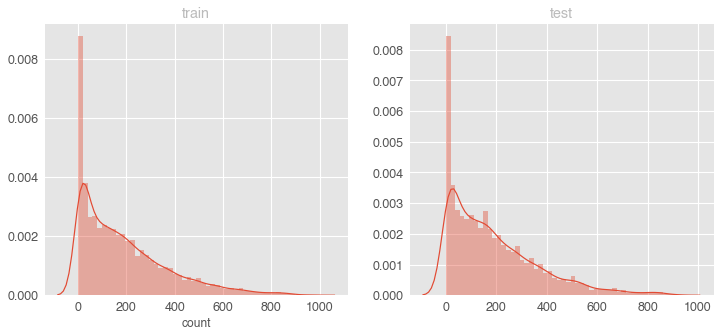

In [35]:
fig, (ax1, ax2) = plt.subplots(ncols = 2)
fig.set_size_inches(12,5)

sns.distplot(y_train, ax=ax1, bins = 50)
ax1.set(title= 'train')
sns.distplot(predictions, ax = ax2, bins = 50)
ax2.set(title = 'test')

# Submit

In [37]:
submission = pd.read_csv('./data/sampleSubmission.csv')
submission

submission['count'] = predictions

print(submission.shape)
submission.head()

(6493, 2)


,datetime,count
0,2011-01-20 00:00:00,12.72
1,2011-01-20 01:00:00,5.01
2,2011-01-20 02:00:00,3.92
3,2011-01-20 03:00:00,3.48
4,2011-01-20 04:00:00,3.16


In [38]:
submission.to_csv('data/Score_{0:.5f}_submission.csv'.format(score), index = False)

Credit:<br> 
* <a href='https://www.kaggle.com/viveksrinivasan/eda-ensemble-model-top-10-percentile'>EDA & Ensemble Model (Top 10 Percentile)</a>
* <a href='https://www.youtube.com/playlist?list=PLaTc2c6yEwmotOgH9PIBpLf3CZEXdD41q'> Kaggle Tutorial by todaycode </a>